<a href="https://colab.research.google.com/github/Tasfiq23/Keras_DNN/blob/main/Fashion_Mnist_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [20]:
X_train_full.shape

(60000, 28, 28)

In [21]:
X_train_full.dtype

dtype('uint8')

In [22]:
X_val,X_train = X_train_full[:50000]/255.0,X_train_full[50000:]/255.0 #scaling the input by dividing by 255 that will down the pixel intensities to 0-1 
y_val,y_train = y_train_full[:50000],y_train_full[50000:]


In [23]:
class_names = ["T-shirt/top", "Trouser","Pullover", "Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [24]:
class_names[y_train[0]]

'Ankle boot'

In [25]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

**Note:**It is recommended to specify the  input_shape when creating the first layer in a sequntial model. But it's okay if we don't. In that case Keras will simply wait until knows the input shape before it actually build the model.This will happen either during train where the data will be fed or when we call the build() method. until then the model wont have any weights and biases and it wont show any model summery.

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #converting each input image into 1D array
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Below the weights are generated randomly to break the symmetry, and biases are initialised at 0. 

In [27]:
#accessing weights and biases of the model
hidden1 = model.layers[1] #1st hidden layer
weights,biases = hidden1.get_weights()
print(weights.shape)
print(weights)
print(biases.shape)
print(biases)

(784, 300)
[[ 0.02501165 -0.01900874 -0.05235035 ...  0.01572484 -0.05342712
   0.02354871]
 [ 0.0425458   0.05040672  0.03561842 ...  0.04751685 -0.06882669
  -0.03804273]
 [ 0.02429014 -0.06192045  0.03788742 ... -0.04467931  0.04392889
   0.04152877]
 ...
 [ 0.02114822 -0.05641159  0.01072343 ... -0.01271338 -0.0309219
   0.04797257]
 [ 0.07102793 -0.01547927 -0.05185598 ...  0.01944583  0.01779997
  -0.07242885]
 [ 0.03037696  0.04502916  0.07070319 ... -0.03512955 -0.0531929
  -0.07111789]]
(300,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [28]:
#compile the model
#sparse_categorical_crossentropy loss since there are sparse labels(for each instance,there is just a target  class index,0-9 in this case) and the classes are exclusive
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=["accuracy"])

In [29]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val))

Epoch 1/30
313/313 [==============================] - 4s 12ms/step - loss: 1.2278 - accuracy: 0.6200 - val_loss: 0.8408 - val_accuracy: 0.7214
Epoch 2/30
313/313 [==============================] - 3s 10ms/step - loss: 0.7320 - accuracy: 0.7548 - val_loss: 0.6822 - val_accuracy: 0.7669
Epoch 3/30
313/313 [==============================] - 4s 11ms/step - loss: 0.6316 - accuracy: 0.7859 - val_loss: 0.5988 - val_accuracy: 0.8033
Epoch 4/30
313/313 [==============================] - 3s 11ms/step - loss: 0.5765 - accuracy: 0.7999 - val_loss: 0.6094 - val_accuracy: 0.7896
Epoch 5/30
313/313 [==============================] - 4s 12ms/step - loss: 0.5429 - accuracy: 0.8132 - val_loss: 0.5438 - val_accuracy: 0.8184
Epoch 6/30
313/313 [==============================] - 4s 12ms/step - loss: 0.5146 - accuracy: 0.8191 - val_loss: 0.5037 - val_accuracy: 0.8301
Epoch 7/30
313/313 [==============================] - 3s 10ms/step - loss: 0.4972 - accuracy: 0.8258 - val_loss: 0.5196 - val_accuracy: 0.8195

**Note:** The fit method returns a History object containing the training parameters (history.params), the list of epochs it went through(history.epoch), and most importantly a dictionary(history.history) containing loss and extra metrics it measured.

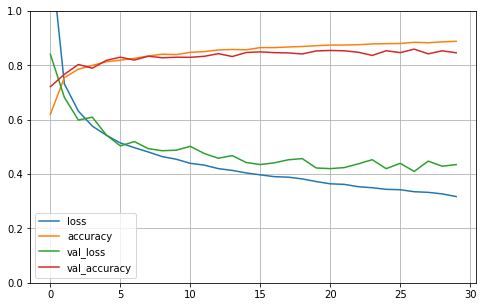

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.show() 

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 76.1583 - accuracy: 0.8229


[76.15834045410156, 0.8228999972343445]

In [32]:

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [36]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

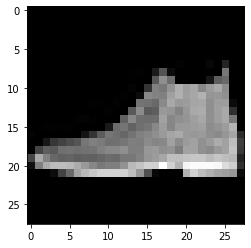

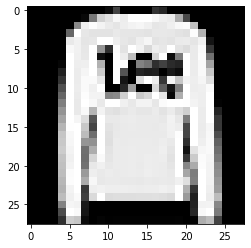

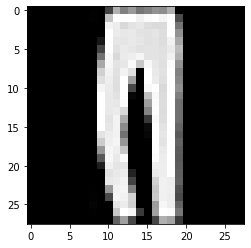

In [42]:


for i in range(3):
  image = X_new[i]
  # plot the sample
  fig = plt.figure
  plt.imshow(image, cmap='gray')
  plt.show()